In [1]:
## Reliability (In R code since no python packages have functionality to perform reliability analysis)
  # Reliability = consistency in measurement, & is bare minimum for measurement to be sound.

# Import/load packages to be used
 # The psych package for psychometrics (reliability analysis) will be used

install.packages('psych')
library(psych)

Installing package into 'C:/Users/Samantha/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Samantha\AppData\Local\Temp\RtmpWcf9Gz\downloaded_packages


Warning message:
"package 'psych' was built under R version 3.5.1"

In [3]:
# A survey questionnaire were provided to 200 people to ask their impressions of a taco brand/company on 5 adjectives representing core themes
 #   in branding process & agreed upon by executive board of company.
 # Each paricipant rated how much each adjective describes the brand on a 1 (not at all) to 10 (completely) scale.
 # Company has suggested the participant score can form a "brand value" index.
 #  1) Inviting
 #  2) Friendly
 #  3) Awesome
 #  4) Quirky
 #  5) Pleasant


# Seek to know whether these question reliably & consisently measure brand sentiment. Must first ask 3 questions:
 #  1) Are answers to these questions interrelated?
 #  2) If so, there evidence that these items seem to be measuring "one thing" or "more than one thing"?
 #  3) If they are measuring one thing, do they do so reliably & how can we optimize relability?


# Import dataset to be used
data <- read.csv("datasets/measurement.csv")

In [4]:
# Explore the data

summary(data)

       id            friendly         inviting         awesome      
 Min.   :  1.00   Min.   : 4.455   Min.   : 3.092   Min.   : 3.221  
 1st Qu.: 50.75   1st Qu.: 6.860   1st Qu.: 6.800   1st Qu.: 6.656  
 Median :100.50   Median : 7.960   Median : 7.873   Median : 8.215  
 Mean   :100.50   Mean   : 7.917   Mean   : 7.796   Mean   : 7.899  
 3rd Qu.:150.25   3rd Qu.: 9.080   3rd Qu.: 9.047   3rd Qu.: 9.255  
 Max.   :200.00   Max.   :10.000   Max.   :10.000   Max.   :10.000  
     quirky         pleasant     
 Min.   : 8.71   Min.   : 3.976  
 1st Qu.:10.00   1st Qu.: 6.832  
 Median :10.00   Median : 7.793  
 Mean   : 9.97   Mean   : 7.809  
 3rd Qu.:10.00   3rd Qu.: 9.167  
 Max.   :10.00   Max.   :10.000  

In [5]:
# Do these five adjectives reliably form a single index of anything?
 # Check the correlations among the items
  # Can drop id variable, as all commands from here on out require that we input a data frame that has only the items needed for analysis.
   # Could also make new data fram just for items you want if you are working w/ a larger set of data.

data <- data[, -1]
names(data)

[1] "friendly" "inviting" "awesome"  "quirky"   "pleasant"

In [6]:
# Now check for correlation on measures

round(cor(data), 2)

,friendly,inviting,awesome,quirky,pleasant
friendly,1.00,0.81,0.80,0.30,0.81
inviting,0.81,1.00,0.70,0.22,0.64
awesome,0.80,0.70,1.00,0.23,0.64
quirky,0.30,0.22,0.23,1.00,0.27
pleasant,0.81,0.64,0.64,0.27,1.00


Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
" A loading greater than abs(1) was detected.  Examine the loadings carefully."The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"

Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


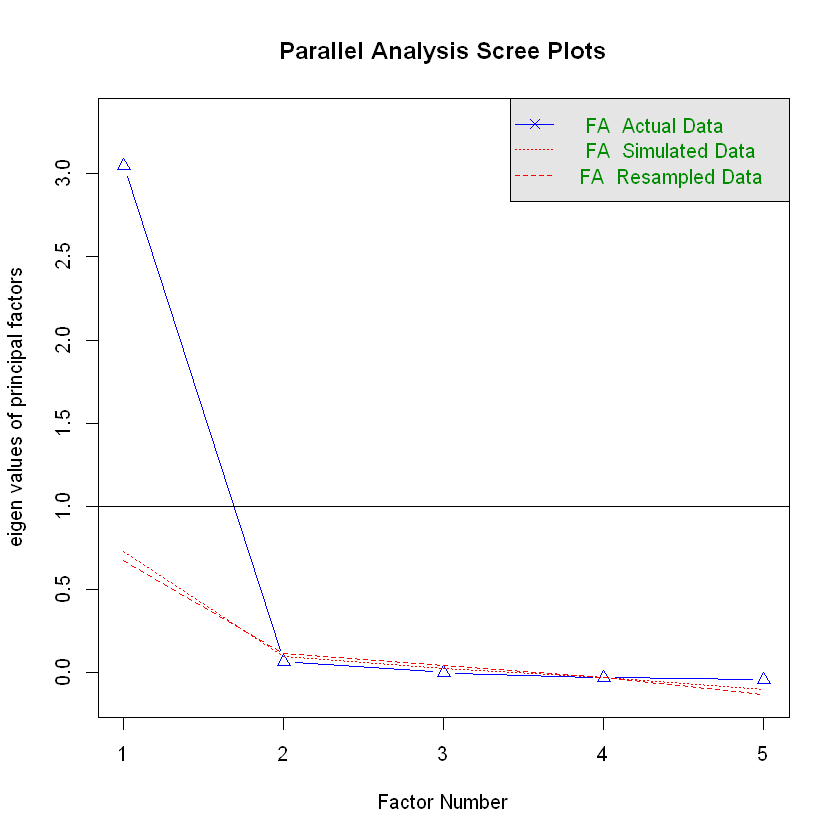

In [7]:
# Above - Most of the items are strongly inter-correlated, except for 'quirky'.
  #  Flag as possible odd item.


# One Dimension?
 # Can break down reliability test into 2 stages
 #  1) Can ask whether we are measuring "one thing" or several things.
    # Factor analysis - similiar to "principle component analysis" tells us how many underlying dimensions appear to be operating beneath this set of variables.
     # Analyzes patterns of association b/w items to determine if they "cluster together" & if so, how.     
     # "Items" - are questions in survey writing
     # "Factors" - are underlying dimensions
 # It computes a number of "eigenvalues" for the data
  # Historically, the number of eigenvalues above 1.0 was seen as the number of factors in the data.
   # Example - If we had 3 eigenvalues above 1.0, that would be evidence that our questions measure 3 underlying dimensions.
  # Modern techniques involve a "parellel analysis" in which the computer generates random data  (based on your data) but w/ no underlying factors.
   # Where your data differ from the simulated data, you have evidence for a factor.
   # We

# Will use fa.parallel() from psych package using the minres factor method (fm ='minres') which makes few assumptions about normality of data
 # Also tell it to be a "factor analysis" (fa = 'fa')

fa.parallel(data, fm = 'minres', fa = 'fa')

In [8]:
# Above - The computer here is telling us that we see evidence for one factor & supported by the graph.
 # Red lines in graph represent results from random computer-generated data, whereas blue line represents our data.
 # For column labeled "factor number 1", blue line & red lines diverge (evidence of a factor).
  # Further, "eigenvalue" for that colum is above 1.0 (height of blue triangle on y-axis).
 # Remaining columns on graph, our data (blue line) gives identical results to simulated data (red lines), thus no evidence for any additional factors.
  # Can conclude that we have one underlying dimension to our data & thus we are measuring "one thing" w/ this set of questions.


# Can focus on in on our questions & consider whether our items each correlate well (called "loadings") w/ the "one underlying dimension".
 # A good question is conceptually close to underlying dimension & therefore doesn't 'pick up' on a lot of other junk.

# Will run a more detailed factor analysis using fa() command from psych package, specifically asking it to retrieve one factor.
 # Then look at the "loadings". Good correlations should be highly correlated to our underlying dimension.
  # Be wary of anything in the 0.3 - 0.5 range or below.
 # Loadings are given in in the column labeled MR1.
 # NOTE - Can get much more detailed analyses if you omit the $loadings code, but you won't be able to make sense of it without a richer understanding of factor analysis, which is beyond this tutorial).

fa(data, nfactors = 1, fm = "minres")$loadings


Loadings:
         MR1  
friendly 0.992
inviting 0.818
awesome  0.812
quirky   0.299
pleasant 0.805

                 MR1
SS loadings    3.048
Proportion Var 0.610

In [ ]:
# Above - "friendly", "inviting", "awesome" & "pleasant" questions are higly correlated (~0.80) w/ underlying factor. 
 # "Quirky" does not load as well, w/ a weak correlation & loading at only 0.299.
  # Consider analyzing "quirky" separately or removing it from the measure completely.

# Factor analyses almost always overfit the data (i.e. they will model the sample data perfectly).
 # Thus, they are often worth replicating in a separate set of data, if possible.
 # Sometimes useful to split data in half, training the model in one set of data & cross-validating in other.

In [9]:
# Next assess reliability of the measure
 # Reliability - the percentage of variance on the scores due to the thing you are measuring (i.e., due to the factor)
  # If reliability is 100%, then our measure is perfectly reliable & every bump in data is real variation in sentiment.
  # If reliability is less than 100%, let's say 80%, then most of variation is due to the thing you are measuring but remaining 20% is measurement error,
  #   other random unrelated junk that you do not care about & is watering down your measure.
  # Reliability b/w 0.70 & 0.90 is good, w/ 0.80 - 0.95 preferred.
  # Trade-off in measurement, if you can get perfect score by asking same question several different ways, but it's redundant and uninformative.
   # If asked differently, relability might suffer, but more information is added.

# Use alpha() from psych package to assess relability of measure.
 # Best to preface the command with psych:: to specify it comes from psych package since ggplot2 also has same command.

psych::alpha(data)


Reliability analysis   
Call: psych::alpha(x = data)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.86      0.86    0.87      0.54 5.9 0.0098  8.3 1.1     0.64

 lower alpha upper     95% confidence boundaries
0.84 0.86 0.88 

 Reliability if an item is dropped:
         raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
friendly      0.77      0.77    0.75      0.45  3.3    0.016 0.0526  0.46
inviting      0.80      0.81    0.82      0.51  4.1    0.012 0.0736  0.47
awesome       0.81      0.81    0.82      0.51  4.1    0.012 0.0764  0.47
quirky        0.91      0.92    0.91      0.73 10.9    0.011 0.0069  0.75
pleasant      0.81      0.80    0.82      0.51  4.1    0.011 0.0818  0.50

 Item statistics 
           n raw.r std.r r.cor r.drop mean   sd
friendly 200  0.95  0.93  0.96   0.92  7.9 1.35
inviting 200  0.88  0.85  0.82   0.78  7.8 1.54
awesome  200  0.88  0.84  0.81   0.77  7.9 1.70
quirky   200  0.31  0.51  0.30   0.29 10.0 0.14
pl

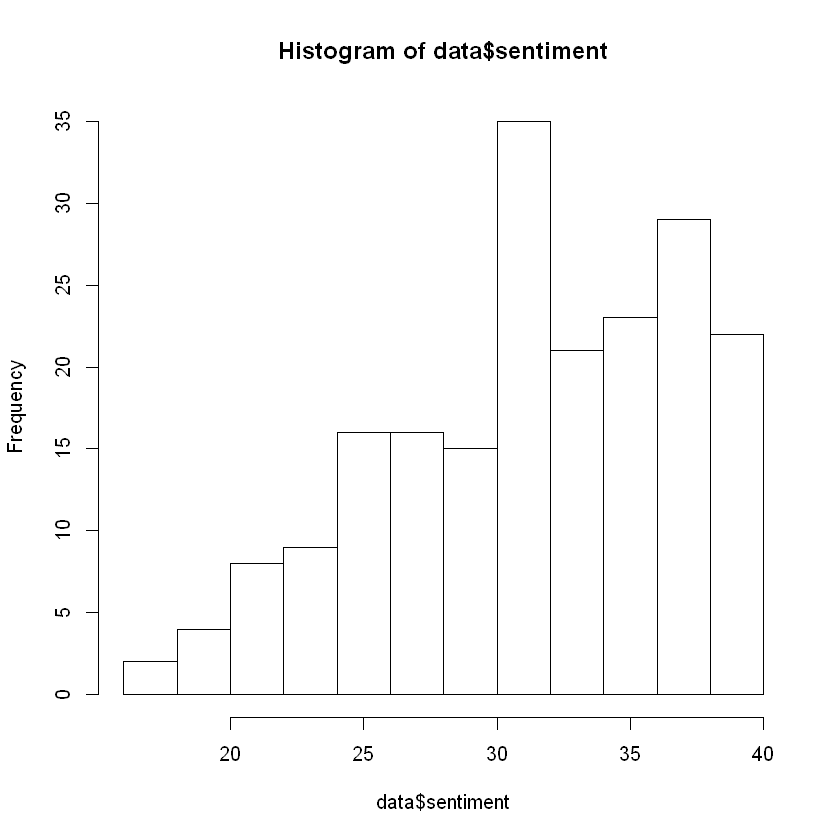

In [10]:
# Above -Top row gives alpha = 0.86, meaning our measure is 86% reliable, or only 14% measurement error.
 # Average correlation among out items is 0.54. But if we dropped "quirky", it improves to 0.73 w/ increase in reliability to 0.91 also.
 # This factor analysis confirms our gut instinct that "quirky" should be dropped (& reported separately if desired).

# Score the scale using rowSums(), which accepts a data.frame() of desired values.

data$sentiment <- rowSums(data.frame(data$friendly, data$inviting, data$awesome, data$pleasant))
hist(data$sentiment)

In [ ]:
# We still have not assess whether the thing we are measuring is sentiment, but will be explored (validity) in next notebook.